In [1]:
# Code source
import numpy as np
import pandas as pd

# Set seed for reproducibility
SEED = 1234

### Reading the Telco Customer Churn csv file

In [2]:
telco_cust_churn = pd.read_csv('Telco-Customer-Churn.csv')
print('Shape: ',telco_cust_churn.shape)

Shape:  (7043, 21)


In [3]:
telco_cust_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### Exploring the dataset

In [4]:
telco_cust_churn.info()  # only 4 numeric fields out of 21 but shows only 3, TotalCharges is shown as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco_cust_churn.isnull().sum()  # there are no NULL values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
## the dataset has no Null values but the field TotalCharges is set as object type instead of float64
## convert TotalCharges to numeric and convert blanks to NaN
telco_cust_churn['TotalCharges'] = pd.to_numeric(telco_cust_churn['TotalCharges'], errors='coerce')

telco_cust_churn.info()

telco_cust_churn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
## let's drop the 11 NAN field in TotalCharges
telco_cust_churn = telco_cust_churn.dropna(subset=['TotalCharges'])

telco_cust_churn.info()

telco_cust_churn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
churn_split = telco_cust_churn['Churn'].value_counts()
churn_split ## Getting a count of churn to non-churn customer in the dataset

Churn
No     5174
Yes    1869
Name: count, dtype: int64

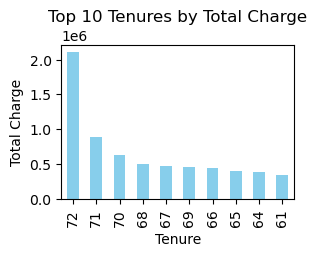

In [12]:
totchg_tenure = telco_cust_churn.groupby('tenure')['TotalCharges'].sum()

top_10_tenures = totchg_tenure.nlargest(10)
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(3, 2))
top_10_tenures.plot(kind='bar', color='skyblue')
plt.title('Top 10 Tenures by Total Charge')
plt.xlabel('Tenure')
plt.ylabel('Total Charge')
plt.show()

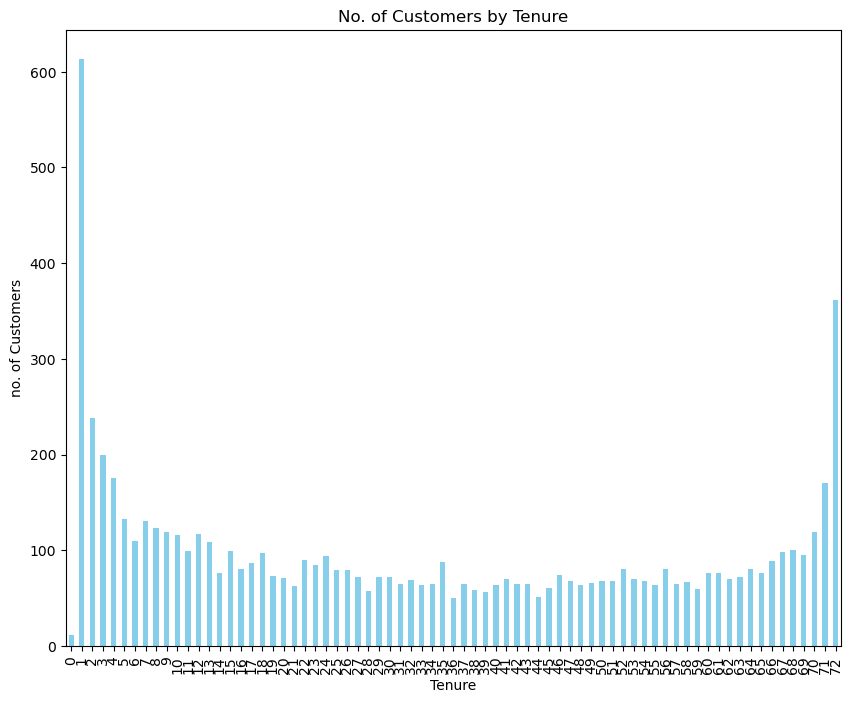

In [20]:
cust_tenure = telco_cust_churn.groupby('tenure')['customerID'].nunique()
# Plotting
plt.figure(figsize=(10, 8))
cust_tenure.plot(kind='bar', color='skyblue')
plt.title('No. of Customers by Tenure')
plt.xlabel('Tenure')
plt.ylabel('no. of Customers')
plt.show()

In [14]:
gender_split = telco_cust_churn['gender'].value_counts()
gender_split ## Getting a count by gender in the dataset

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [15]:
cols = telco_cust_churn.columns
#telco_cust_churn.groupby['customerID',].nunique()
col  = cols[1:]

for c in col:
    print(telco_cust_churn[c].value_counts())


gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
DeviceProtection
No                     3095
Yes                    2422
No

### Label Encoding the categorical and Standard Scaling the numeric fields

In [21]:
# Get column names based on dtype
numeric_columns = telco_cust_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numeric_columns)
print('-------')
categorical_columns = telco_cust_churn.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
-------
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [22]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical features
label_encoder = LabelEncoder()
for col in telco_cust_churn:
    telco_cust_churn[col] = label_encoder.fit_transform(telco_cust_churn[col])

# Standard scaling numeric columns
scaler = StandardScaler()
telco_cust_churn[numeric_columns] = scaler.fit_transform(telco_cust_churn[numeric_columns])

In [23]:
telco_cust_churn.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.131766,-1.558384,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.387740,0.266039,0


### Splitting the dataframe into X-Y and test-train set

In [24]:
X = telco_cust_churn.iloc[ : , :20]
print(X.head(2))
print("------")
y = telco_cust_churn['Churn']
print(y.head(2))

   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5375       0      -0.439916        1           0 -1.277445   
1        3962       1      -0.439916        0           0  0.066327   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             0              1                0               0             2   
1             1              0                0               2             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2       -1.131766     -1.558384  
1                 0              3       -0.387740      0.266039  
------
0    0
1    0
Name: Churn, dtype: int32


In [25]:
import collections
from sklearn.model_selection import train_test_split

TRAIN_SIZE = 0.8
TEST_SIZE  = 0.2

def train_val_test_split(X, y, train_size):
    """Split dataset into data splits."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    return X_train, X_test, y_train, y_test

# Create data splits
X_train, X_test, y_train, y_test = train_val_test_split(
    X=X, y=y, train_size=TRAIN_SIZE)

print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (5634, 20), y_train: (5634,)
X_test: (1409, 20), y_test: (1409,)


In [26]:
# Class weights
counts = np.bincount(y_train)
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"counts: {counts}\nweights: {class_weights}")

counts: [4139 1495]
weights: {0: 0.00024160425223483932, 1: 0.0006688963210702341}


In [17]:
!pip install torch

Note: you may need to restart the kernel to use updated packages.


### Defining a simple Non-Linear Neural Network

In [81]:
import torch

# Set seed for reproducibility
torch.manual_seed(SEED)

from torch import nn
import torch.nn.functional as F

INPUT_DIM = X_train.shape[1] # X is 20-dimensional
HIDDEN_DIM = 60   # keeping layer 1 with 60

NUM_CLASSES = 1    # 1 class (binary for churn or no-churn)

class SimpleModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim)
        self.layer_out = nn.Linear(hidden_dim, num_classes)
        
        self.relu = nn.ReLU() 
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim)

    def forward(self, x_in):
        z = F.relu(self.layer1(x_in)) # rectified linear unit (ReLU) activation
        z = self.batchnorm1(z)
        z = self.dropout(z)
        z = self.sigmoid(self.layer_out(z))
        
        return z
    
    
# Initialize model
simple_model = SimpleModel(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, num_classes=NUM_CLASSES)
print (simple_model.named_parameters)


<bound method Module.named_parameters of SimpleModel(
  (layer1): Linear(in_features=20, out_features=60, bias=True)
  (layer_out): Linear(in_features=60, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)>


### Setup before Training

In [93]:
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

LEARNING_RATE = 0.001
BATCH_SIZE = 32


# Define Loss
class_weights_tensor = torch.Tensor(list(class_weights.values()))

loss_func = nn.BCELoss()  ## using Binary cross Entropy Loss function as the output is 0/1 (binary)
##weight=class_weights_tensor

# Optimizer
optimizer = Adam(simple_model.parameters(), lr=LEARNING_RATE)

# Convert DF to Tensor
X_train_tensor = torch.Tensor(X_train.values).float()
y_train_tensor = torch.Tensor(y_train.values).float()

# Convert DF to Tensor
X_test_tensor = torch.Tensor(X_test.values).float()
y_test_tensor = torch.Tensor(y_test.values).float()

#Both x_train and y_train can be combined in a single TensorDataset, which will be easier to iterate over and slice
y_train_tensor = y_train_tensor.unsqueeze(1)
train_ds = TensorDataset(X_train_tensor, y_train_tensor)

#Pytorch’s DataLoader is responsible for managing batches. 
#You can create a DataLoader from any Dataset. DataLoader makes it easier to iterate over batches
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE)

#For the test dataset
y_test_tensor = y_test_tensor.unsqueeze(1)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE)

### Training

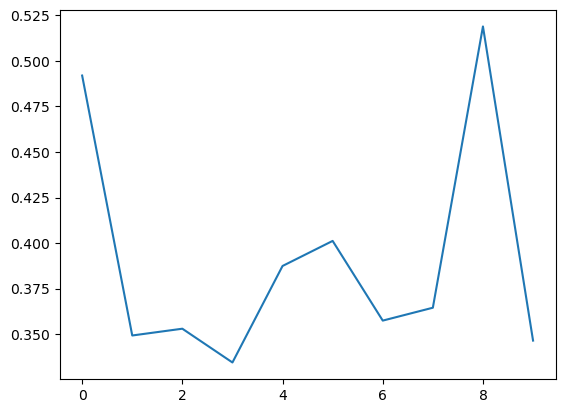

In [114]:
# Training
NUM_EPOCHS = 10

simple_model.train()

train_loss = []

for epoch in range(NUM_EPOCHS):
    #Within each epoch run the subsets of data = batch sizes.
    for xb, yb in train_dl:
        y_pred = simple_model(xb)     # Forward Propagation
        loss = loss_func(y_pred, yb)  # Loss Computation
        optimizer.zero_grad()         # Clearing all previous gradients, setting to zero 
        loss.backward()               # Back Propagation
        optimizer.step()              # Updating the parameters 
    #print("Loss in iteration :"+str(epoch)+" is: "+str(loss.item()))
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.show()

### Defning Non-Linear Neural Network
#### tuning with layers and nnodes

In [106]:
import torch

# Set seed for reproducibility
torch.manual_seed(SEED)

from torch import nn
import torch.nn.functional as F

INPUT_DIM = X_train.shape[1] # X is 20-dimensional
HIDDEN_DIM = [120, 60, 30]   # keeping multiple layer

NUM_CLASSES = 1    # 1 class (binary for churn or no-churn)

class tunedModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(tunedModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, hidden_dim[0])
        self.layer2 = nn.Linear(hidden_dim[0], hidden_dim[1])
        self.layer3 = nn.Linear(hidden_dim[1], hidden_dim[2])
        self.layer_out = nn.Linear(hidden_dim[2], num_classes)
        
        self.relu = nn.ReLU() 
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(hidden_dim[0])
        self.batchnorm2 = nn.BatchNorm1d(hidden_dim[1])
        self.batchnorm3 = nn.BatchNorm1d(hidden_dim[2])

    def forward(self, x_in):
        z = F.relu(self.layer1(x_in)) # rectified linear unit (ReLU) activation
        z = self.batchnorm1(z)
        z = F.relu(self.layer2(z))
        z = self.batchnorm2(z)
        z = F.relu(self.layer3(z))
        z = self.batchnorm3(z)
        z = self.dropout(z)
        z = self.sigmoid(self.layer_out(z))
        
        return z
    
# Initialize model
tuned_model = tunedModel(input_dim=INPUT_DIM, hidden_dim=HIDDEN_DIM, num_classes=NUM_CLASSES)
print (tuned_model.named_parameters)

<bound method Module.named_parameters of tunedModel(
  (layer1): Linear(in_features=20, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=60, bias=True)
  (layer3): Linear(in_features=60, out_features=30, bias=True)
  (layer_out): Linear(in_features=30, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(30, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)>


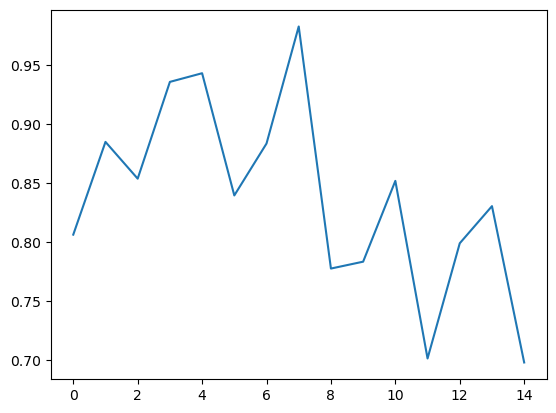

In [116]:
# Training
NUM_EPOCHS = 15
LEARNING_RATE = 0.001

tuned_model.train()

tuned_train_loss = []

for epoch in range(NUM_EPOCHS):
    #Within each epoch run the subsets of data = batch sizes.
    for xb, yb in train_dl:
        y_pred = tuned_model(xb)     # Forward Propagation
        loss = loss_func(y_pred, yb)  # Loss Computation
        optimizer.zero_grad()         # Clearing all previous gradients, setting to zero 
        loss.backward()               # Back Propagation
        optimizer.step()              # Updating the parameters 
    #print("Loss in iteration :"+str(epoch)+" is: "+str(loss.item()))
    tuned_train_loss.append(loss.item())

plt.plot(tuned_train_loss)
plt.show()

### Running the tuned model on Test data

In [122]:
import itertools

y_pred_list = []
tuned_model.eval()

with torch.no_grad():
    for xb_test,yb_test  in test_loader:
        y_test_pred = tuned_model(xb_test)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.detach().numpy())

#Takes arrays and makes them list of list for each batch        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
#y_pred_list
#flattens the lists in sequence

y_pred_list = [a.tolist() if isinstance(a, torch.Tensor) else [a] for a in y_pred_list]
ytest_pred = list(itertools.chain.from_iterable(y_pred_list))

### Metrics 

Prcision, Recall, F1 S1 Score